#**Introducción a Machine Learning**

#_Desafío 1: Regularización paramétrica_

##**Francisca Pinto**
##**03 de octubre de 2021**

Comentarios:
1. Se inicia la instalación de módulos para la ejecución de celdas en Google Drive. Se dejarán las celdas relativas a este proceso con "<code>#</code>".
2. Se inicia con los imports y la incorporación del DataFrame.

###Ejercicio 1

In [1]:
!pip install ipython-autotime

In [2]:
#tiempo de ejecución
%load_ext autotime

#dataframe y arrays
import pandas as pd
import numpy as np

#gráficos

import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#regresión lineal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#estandarización de atributos
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#sklearn análisis resumido
from sklearn.pipeline import Pipeline

#análisis de nulos dedataframe
import missingno as msno

#regularización
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

#quitar warnings
import warnings
warnings.filterwarnings(action = "ignore")

time: 829 ms (started: 2021-10-03 19:39:22 +00:00)


In [3]:
plt.style.use("seaborn") #tipo de gráfico, estilo
plt.rcParams["figure.figsize"] = (5,5) #escalar gráficos
plt.rcParams["figure.dpi"] = 150 #DPI gráficos (también modifica tamaño)

time: 1.82 ms (started: 2021-10-03 19:39:23 +00:00)


In [4]:
#AUX: montar archivos y carpetas desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.74 ms (started: 2021-10-03 19:39:23 +00:00)


In [5]:
colab_path = "/content/drive/MyDrive/ADL/3_Intro ML/Desafío 1_ Regularización/winequality-red.csv"
df = pd.read_csv(colab_path)
df.reset_index(drop = True, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


time: 574 ms (started: 2021-10-03 19:39:23 +00:00)


Ejercicio 2

In [6]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
time: 16.9 ms (started: 2021-10-03 19:39:24 +00:00)


Comentarios:
1. Los tipos de datos son <code>float</code> e <code>integer</code>, lo que coincide con las características de la información proporcionada en cada caso, lo que permite inferir la inexistencia de valores nulos o términos mal ingresados (como "?" u otros símbolos).
2. En la siguiente sección, se realizarán <code>boxplots</code> para identificar outliers univariados, y <code>lmplots</code> para identificar outliers bivariados.

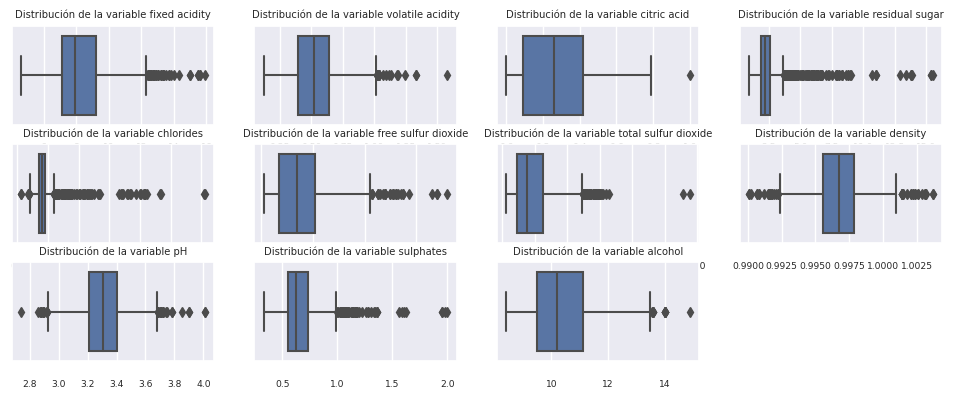

time: 2.89 s (started: 2021-10-03 19:39:24 +00:00)


In [7]:
sns.set(font_scale = 0.6)
plt.rcParams["figure.dpi"] = 100 #DPI gráficos
plt.rcParams["figure.figsize"] = (12, 6)    
plt.tight_layout()

for n, i in enumerate(df.iloc[:, 0:-1]):
  
  plt.subplot(4, 4, n+1)
  sns.boxplot(df[i], hue = df["quality"])
  plt.title(i)
  plt.xlabel("")
  plt.title(f"Distribución de la variable {i}")

In [8]:
cols = df.columns[:-1]

for i in cols:

  outlier_list = []
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr
  print(f"Variable {i}, cantidad de valores outlier: ")
  print(df.loc[(df[i] < lower_limit) | (df[i] > upper_limit)].value_counts().sum())

Variable fixed acidity, cantidad de valores outlier: 
49
Variable volatile acidity, cantidad de valores outlier: 
19
Variable citric acid, cantidad de valores outlier: 
1
Variable residual sugar, cantidad de valores outlier: 
155
Variable chlorides, cantidad de valores outlier: 
112
Variable free sulfur dioxide, cantidad de valores outlier: 
30
Variable total sulfur dioxide, cantidad de valores outlier: 
55
Variable density, cantidad de valores outlier: 
45
Variable pH, cantidad de valores outlier: 
35
Variable sulphates, cantidad de valores outlier: 
59
Variable alcohol, cantidad de valores outlier: 
13
time: 119 ms (started: 2021-10-03 19:39:27 +00:00)


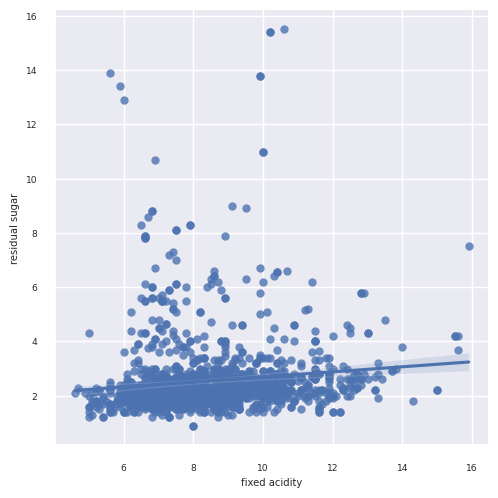

time: 898 ms (started: 2021-10-03 19:39:27 +00:00)


In [9]:
sns.lmplot(data = df, x = "fixed acidity", y = "residual sugar")

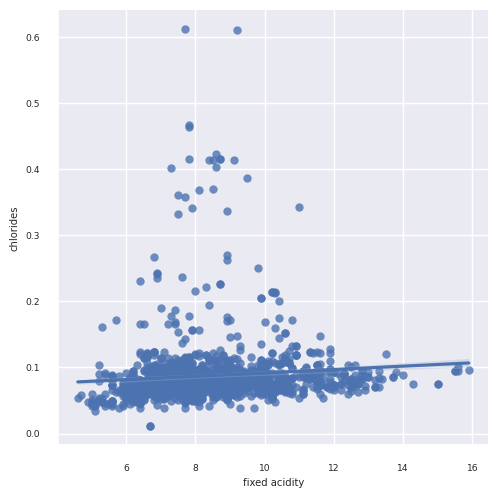

time: 884 ms (started: 2021-10-03 19:39:28 +00:00)


In [10]:
sns.lmplot(data = df, x = "fixed acidity", y = "chlorides")

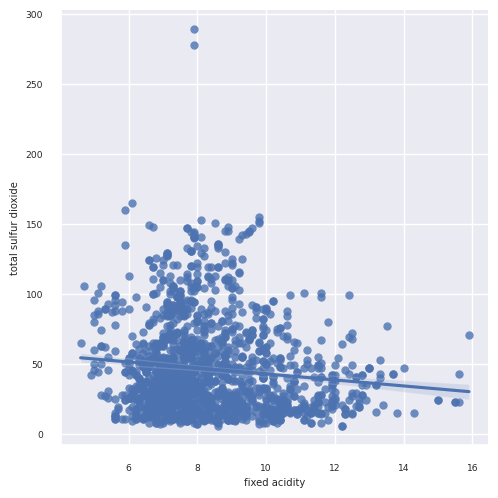

time: 901 ms (started: 2021-10-03 19:39:29 +00:00)


In [11]:
sns.lmplot(data = df, x = "fixed acidity", y = "total sulfur dioxide")

Comentarios:

1. Se itera en el DataFrame para calcular la cantidad de valores outlier en cada variable para encontrar los outliers univariados. Las 4 variables con más valores de este tipo son:

* Sugar
* Chrolides
* Sulphates
* Fixed Acidity

2. Respecto a los outliers bivariados, se realizan gráficos tipo <code>lmplot</code> para detectarlos en los casos de:

* Fixed Acidity y Residual Sugar: outliers en la parte superior del gráfico, con altos valores de Residual Sugar, fuera de la tendencia que se muestra en la mayorçia de la muestra.
* Fixed Acidity y Chlorides: outliers también en la parte superior del gráfico con los valores más altos de Chlorides, fuera de la recta que proyecta la relación entre la mayoría de los datos del DataFrame.
* Fixed Acidity y Total Sulfur Dioxide: se muestra un caso equivalente, con observaciones outlier con niveles altos en la segunda variable con un nivel de acidez ajustada de 8, fuera de la tendencia que se muestra con una recta con una ligera pendiente negativa en la parte inferior del gráfico.


3. Se continúa con la separación en matrices de entrenamiento y validación del dataset, previa estandarización de los atributos. Posteriormente, se realizan las modelaciones y se analizan los resultados.

###Ejercicio 3

In [12]:
X = df.iloc[:, :-1]
X = pd.DataFrame(StandardScaler().fit_transform(X), columns = cols)
y = df["quality"]

time: 15.9 ms (started: 2021-10-03 19:39:29 +00:00)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 1)


time: 4.92 ms (started: 2021-10-03 19:39:29 +00:00)


In [14]:
lambdas_ridge = np.logspace(0, 7, base = 10)
lambdas_lasso = np.logspace(0, 3, base = 10)
lambdas_elasticnet = np.logspace(0, 3, base = 10)

ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(X_train, y_train)
y_hat_ridge = model_ridge.predict(X_test)

lasso_cv = LassoCV(cv = 10)
model_lasso = lasso_cv.fit(X_train, y_train)
y_hat_lasso = model_lasso.predict(X_test)

elasticnet_cv = ElasticNetCV(cv = 10)
model_elasticnet = elasticnet_cv.fit(X_train, y_train)
y_hat_elasticnet = model_elasticnet.predict(X_test)

time: 499 ms (started: 2021-10-03 19:39:29 +00:00)


In [15]:
def report_visualization(model, Xtest, ytest, yhat):
  print(f"Valor del parámetro de regularización: {model.alpha_}")
  print(f"Coeficientes finales: \n{model.coef_}")
  print(f"R-squared: {r2_score(ytest, yhat)}")
  print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, yhat)}")
  print(f"Median Absolute Error (MAE): {median_absolute_error(ytest, yhat)}")

time: 7.84 ms (started: 2021-10-03 19:39:30 +00:00)


In [16]:
report_visualization(model_ridge, X_test, y_test, y_hat_ridge)

Valor del parámetro de regularización: 10.0
Coeficientes finales: 
[ 0.08234766 -0.19797437 -0.04962564  0.02883283 -0.08313784  0.05473505
 -0.11247594 -0.0703809  -0.05207558  0.15649783  0.28075579]
R-squared: 0.32741412953172266
Mean Squared Error (MSE): 0.3826317371497021
Median Absolute Error (MAE): 0.3666803618897716
time: 8.76 ms (started: 2021-10-03 19:39:30 +00:00)


In [17]:
report_visualization(model_lasso, X_test, y_test, y_hat_lasso)

Valor del parámetro de regularización: 0.0004589521359505871
Coeficientes finales: 
[ 0.07950096 -0.19958599 -0.0513937   0.02719778 -0.08297609  0.05497366
 -0.1125111  -0.06592182 -0.05404112  0.15646394  0.2848829 ]
R-squared: 0.3274328831232638
Mean Squared Error (MSE): 0.38262106829740494
Median Absolute Error (MAE): 0.3684158575010832
time: 10.6 ms (started: 2021-10-03 19:39:30 +00:00)


In [18]:
report_visualization(model_elasticnet, X_test, y_test, y_hat_elasticnet)

Valor del parámetro de regularización: 0.0017199850172063965
Coeficientes finales: 
[ 0.07598783 -0.19880336 -0.04884749  0.0257716  -0.08274155  0.0539915
 -0.11161831 -0.06321139 -0.05415181  0.15541461  0.28556739]
R-squared: 0.32817950277546837
Mean Squared Error (MSE): 0.3821963190021005
Median Absolute Error (MAE): 0.3670448747381836
time: 10.4 ms (started: 2021-10-03 19:39:30 +00:00)


Comentarios:
1. Los 3 indicadores (R2, MSE, MAE) tienen resultados semejantes entre sí, con la aplicación de las regularizaciones de Ridge, Lasso y Elastic Net.
2. R2 es ligeramente mayor en el caso del modelo donde se aplicó el método de Elastic Net, MSE es mayor en el caso de Ridge, y MAE en el modelo Lasso. A pesar de ello, las diferencias entre los indicadores en los 3 modelos son bajas.
3. Respecto a los parámetros la situación es diferente: en el caso de Ridge el parámetro es 10, en comparación a los parámetros de Lasso y Elastic Net, donde son mucho más bajos (con razones 1/25.000 en el modelo con Lasso, y 1/100.000 en el modelo con Elastic Net). El último modelo, que combina las regularizaciones anteriores, tiene incluso un parámetro menor.